In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context='notebook', style='darkgrid', palette='deep',font_scale=1.2, font='sans-serif'
        ,color_codes=True, rc=None)
df_accident = pd.read_csv("dft-road-casualty-statistics-accident-2019.csv", low_memory=False)
df_casualty = pd.read_csv("dft-road-casualty-statistics-casualty-2019.csv", low_memory=False)
df_data_guide = pd.read_excel("Road-Safety-Open-Dataset-Data-Guide.xlsx")

In [2]:
df_accident.head(2)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2019010128300,2019,010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,...,5,1,1,1,0,0,1,3,2,E01004762
1,2019010152270,2019,010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,...,9,4,1,1,0,0,1,3,2,E01003117


In [3]:
df_casualty.head(2)

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2019010128300,2019,010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,2019,010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5


### Checking number of missing values in both datasets

In [4]:
df_casualty.isna().sum()

accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

In [5]:
df_accident.isna().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          28
location_northing_osgr                         28
longitude                                      28
latitude                                       28
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [6]:
df_accident.shape

(117536, 36)

In [7]:
df_casualty.shape

(153158, 18)

In [8]:
df_accident_data = df_accident.drop(["location_easting_osgr","location_northing_osgr","local_authority_ons_district","first_road_class","first_road_number",
                                "junction_detail","junction_control","second_road_class","second_road_number",
                                "pedestrian_crossing_human_control","pedestrian_crossing_physical_facilities",
                                "carriageway_hazards","did_police_officer_attend_scene_of_accident","trunk_road_flag",
                               "lsoa_of_accident_location"], axis =1)
df_accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   accident_index              117536 non-null  object 
 1   accident_year               117536 non-null  int64  
 2   accident_reference          117536 non-null  object 
 3   longitude                   117508 non-null  float64
 4   latitude                    117508 non-null  float64
 5   police_force                117536 non-null  int64  
 6   accident_severity           117536 non-null  int64  
 7   number_of_vehicles          117536 non-null  int64  
 8   number_of_casualties        117536 non-null  int64  
 9   date                        117536 non-null  object 
 10  day_of_week                 117536 non-null  int64  
 11  time                        117536 non-null  object 
 12  local_authority_district    117536 non-null  int64  
 13  local_authorit

In [9]:
df_casualty_data = df_casualty.drop(["casualty_imd_decile"], axis =1)
df_casualty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153158 entries, 0 to 153157
Data columns (total 17 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   accident_index                      153158 non-null  object
 1   accident_year                       153158 non-null  int64 
 2   accident_reference                  153158 non-null  object
 3   vehicle_reference                   153158 non-null  int64 
 4   casualty_reference                  153158 non-null  int64 
 5   casualty_class                      153158 non-null  int64 
 6   sex_of_casualty                     153158 non-null  int64 
 7   age_of_casualty                     153158 non-null  int64 
 8   age_band_of_casualty                153158 non-null  int64 
 9   casualty_severity                   153158 non-null  int64 
 10  pedestrian_location                 153158 non-null  int64 
 11  pedestrian_movement                 153

### Dropping NAN in the dataframe for Accident

In [10]:
df_accident_data[df_accident_data['longitude'].isna()] 
#28 columns for latitude and longitude

,accident_index,accident_year,accident_reference,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,time,local_authority_district,local_authority_highway,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,urban_or_rural_area
27337,2019040854828,2019,040854828,NaN,NaN,4,3,2,1,21/06/2019,...,20:15,114,E08000010,3,70,1,1,1,0,3
29369,2019051910615,2019,051910615,NaN,NaN,5,3,1,1,04/03/2019,...,17:50,95,E08000015,6,30,4,5,2,0,3
30791,2019051912864,2019,051912864,NaN,NaN,5,2,2,2,08/11/2019,...,19:18,91,E08000012,6,30,6,1,2,0,3
34816,2019070003662,2019,070003662,NaN,NaN,7,3,1,1,04/01/2019,...,15:56,130,E06000050,6,30,1,9,1,0,3
35505,2019070275916,2019,070275916,NaN,NaN,7,3,2,1,28/05/2019,...,18:00,128,E06000007,1,30,1,1,1,0,3
36347,2019070700923,2019,070700923,NaN,NaN,7,3,2,1,30/11/2019,...,11:35,129,E06000049,1,50,1,1,1,0,3
39798,2019121900341,2019,121900341,NaN,NaN,12,2,1,2,24/02/2019,...,15:38,187,E10000023,3,70,1,1,1,0,3
39919,2019121900485,2019,121900485,NaN,NaN,12,3,2,3,08/04/2019,...,08:47,185,E10000023,3,70,1,1,1,0,3
39933,2019121900505,2019,121900505,NaN,NaN,12,3,2,1,18/03/2019,...,17:57,182,E10000023,6,30,4,1,2,0,3
40179,2019121900771,2019,121900771,NaN,NaN,12,3,3,1,02/02/2019,...,10:29,186,E10000023,6,60,1,3,3,0,3


In [11]:
#To view the Longitude and Latitude columns without their NaN values
df_accident_data =df_accident_data.dropna(subset=["longitude","latitude"])
df_accident_data 

,accident_index,accident_year,accident_reference,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,time,local_authority_district,local_authority_highway,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,urban_or_rural_area
0,2019010128300,2019,010128300,-0.153842,51.508057,1,3,2,3,18/02/2019,...,17:50,1,E09000033,1,30,1,1,1,0,1
1,2019010152270,2019,010152270,-0.127949,51.436208,1,3,2,1,15/01/2019,...,21:45,9,E09000022,2,30,4,1,1,0,1
2,2019010155191,2019,010155191,-0.124193,51.526795,1,3,2,1,01/01/2019,...,01:50,2,E09000007,6,30,4,1,1,0,1
3,2019010155192,2019,010155192,-0.191044,51.546387,1,2,1,1,01/01/2019,...,01:20,2,E09000007,6,20,4,1,1,0,1
4,2019010155194,2019,010155194,-0.200064,51.541121,1,3,2,2,01/01/2019,...,00:40,28,E09000005,6,30,4,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117531,2019984106919,2019,984106919,-3.368899,55.047323,98,3,1,1,18/05/2019,...,01:00,917,S12000006,6,60,1,1,2,0,2
117532,2019984107019,2019,984107019,-2.983499,55.215407,98,3,4,1,30/05/2019,...,08:46,917,S12000006,6,60,1,1,2,0,2
117533,2019984107219,2019,984107219,-3.274645,54.991685,98,3,2,1,21/06/2019,...,15:30,917,S12000006,6,60,1,1,1,0,2
117534,2019984107419,2019,984107419,-2.997491,55.148292,98,3,1,1,29/06/2019,...,14:10,917,S12000006,6,30,1,1,1,0,2


### DATA CLEANING (ACCIDENT)
#### Deleting rows with Data missing or out of range

In [12]:
#Results into 109365
df_accident_data = df_accident_data[(df_accident_data.road_type != -1) & (df_accident_data.road_type != 9) & (df_accident_data.speed_limit != -1) & (df_accident_data.speed_limit != 99) & (df_accident_data.light_conditions != -1) & (df_accident_data.light_conditions != 7) & (df_accident_data.weather_conditions != -1) & (df_accident_data.weather_conditions != 9) & (df_accident_data.road_surface_conditions != -1) & (df_accident_data.road_surface_conditions != 9) & (df_accident_data.special_conditions_at_site != -1) & (df_accident_data.special_conditions_at_site != 9) & (df_accident_data.urban_or_rural_area != -1) & (df_accident_data.urban_or_rural_area != 3)  ]
df_accident_data 

,accident_index,accident_year,accident_reference,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,time,local_authority_district,local_authority_highway,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,urban_or_rural_area
0,2019010128300,2019,010128300,-0.153842,51.508057,1,3,2,3,18/02/2019,...,17:50,1,E09000033,1,30,1,1,1,0,1
1,2019010152270,2019,010152270,-0.127949,51.436208,1,3,2,1,15/01/2019,...,21:45,9,E09000022,2,30,4,1,1,0,1
2,2019010155191,2019,010155191,-0.124193,51.526795,1,3,2,1,01/01/2019,...,01:50,2,E09000007,6,30,4,1,1,0,1
3,2019010155192,2019,010155192,-0.191044,51.546387,1,2,1,1,01/01/2019,...,01:20,2,E09000007,6,20,4,1,1,0,1
4,2019010155194,2019,010155194,-0.200064,51.541121,1,3,2,2,01/01/2019,...,00:40,28,E09000005,6,30,4,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117531,2019984106919,2019,984106919,-3.368899,55.047323,98,3,1,1,18/05/2019,...,01:00,917,S12000006,6,60,1,1,2,0,2
117532,2019984107019,2019,984107019,-2.983499,55.215407,98,3,4,1,30/05/2019,...,08:46,917,S12000006,6,60,1,1,2,0,2
117533,2019984107219,2019,984107219,-3.274645,54.991685,98,3,2,1,21/06/2019,...,15:30,917,S12000006,6,60,1,1,1,0,2
117534,2019984107419,2019,984107419,-2.997491,55.148292,98,3,1,1,29/06/2019,...,14:10,917,S12000006,6,30,1,1,1,0,2


### DATA CLEANING (CASUALTY)
#### Deleting rows with Data missing or out of range

In [13]:
#Output is 129875 
df_casualty_data = df_casualty_data[(df_casualty_data.sex_of_casualty != -1) & (df_casualty_data.sex_of_casualty != 9) & (df_casualty_data.age_of_casualty != -1) &  (df_casualty_data.age_band_of_casualty != -1)  & (df_casualty_data.pedestrian_location != -1) & (df_casualty_data.pedestrian_location != 10) & (df_casualty_data.pedestrian_movement != -1) & (df_casualty_data.pedestrian_movement != 9) & (df_casualty_data.car_passenger != -1) & (df_casualty_data.car_passenger != 9) & (df_casualty_data.bus_or_coach_passenger != -1) & (df_casualty_data.bus_or_coach_passenger != 9) & (df_casualty_data.pedestrian_road_maintenance_worker != -1) & (df_casualty_data.pedestrian_road_maintenance_worker != 9) & (df_casualty_data.casualty_home_area_type != -1)]
df_casualty_data 

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type
0,2019010128300,2019,010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1
3,2019010152270,2019,010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1
4,2019010155191,2019,010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1
5,2019010155192,2019,010155192,1,1,3,1,68,10,2,5,4,0,0,0,0,1
6,2019010155194,2019,010155194,1,1,1,2,47,8,3,0,0,0,0,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153153,2019984106919,2019,984106919,1,1,1,1,24,5,3,0,0,0,0,0,19,3
153154,2019984107019,2019,984107019,1,1,1,1,22,5,3,0,0,0,0,0,19,1
153155,2019984107219,2019,984107219,2,1,1,1,61,9,3,0,0,0,0,0,9,3
153156,2019984107419,2019,984107419,1,1,3,1,54,8,3,5,3,0,0,0,0,3


In [14]:
#df_accident_data.to_csv('df_accident_data.csv', index=False)

In [15]:
#df_casualty_data.to_csv('df_casualty_data.csv', index=False)

## Merging my two datasets to new .csv file

In [16]:
df = pd.merge(df_accident_data, df_casualty_data, on="accident_reference")
df.head(3)

,accident_index_x,accident_year_x,accident_reference,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type
0,2019010128300,2019,010128300,-0.153842,51.508057,1,3,2,3,18/02/2019,...,58,9,3,0,0,0,0,0,9,1
1,2019010152270,2019,010152270,-0.127949,51.436208,1,3,2,1,15/01/2019,...,24,5,3,0,0,0,0,0,9,1
2,2019010155191,2019,010155191,-0.124193,51.526795,1,3,2,1,01/01/2019,...,21,5,3,0,0,0,0,0,1,1


In [17]:
df.shape

(122649, 37)

In [18]:
df.isna().sum()

accident_index_x                      0
accident_year_x                       0
accident_reference                    0
longitude                             0
latitude                              0
police_force                          0
accident_severity                     0
number_of_vehicles                    0
number_of_casualties                  0
date                                  0
day_of_week                           0
time                                  0
local_authority_district              0
local_authority_highway               0
road_type                             0
speed_limit                           0
light_conditions                      0
weather_conditions                    0
road_surface_conditions               0
special_conditions_at_site            0
urban_or_rural_area                   0
accident_index_y                      0
accident_year_y                       0
vehicle_reference                     0
casualty_reference                    0


### Test to match if accident reference in both accident and casualty dataframes match the accident reference  in the merged dataset

In [19]:
df[df['accident_reference'] == '010155192']

,accident_index_x,accident_year_x,accident_reference,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type
3,2019010155192,2019,010155192,-0.191044,51.546387,1,2,1,1,01/01/2019,...,68,10,2,5,4,0,0,0,0,1


In [20]:
df_casualty_data[df_casualty_data['accident_reference'] == '010155192']

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type
5,2019010155192,2019,010155192,1,1,3,1,68,10,2,5,4,0,0,0,0,1


In [21]:
df_accident_data[df_accident_data['accident_reference'] == '010155192']

,accident_index,accident_year,accident_reference,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,time,local_authority_district,local_authority_highway,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,urban_or_rural_area
3,2019010155192,2019,010155192,-0.191044,51.546387,1,2,1,1,01/01/2019,...,01:20,2,E09000007,6,20,4,1,1,0,1


In [22]:
#Dataset Details
pd.DataFrame(data=df.nunique())

,0
accident_index_x,95197
accident_year_x,1
accident_reference,95197
longitude,93583
latitude,92647
police_force,50
accident_severity,3
number_of_vehicles,15
number_of_casualties,17
date,365


In [23]:
for i in range(len(df_data_guide)):
    if df_data_guide['code/format'][i] is not None and df_data_guide['field name'][i].lower() in df.columns:
        df[df_data_guide['field name'][i].lower()] = df[df_data_guide['field name'][i].lower()].replace(
            df_data_guide['code/format'][i], df_data_guide['label'][i])

In [24]:
df.head(4)
#df.to_csv("MainCSVFile.csv", index=False)

,accident_index_x,accident_year_x,accident_reference,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type
0,2019010128300,2019,010128300,-0.153842,51.508057,Metropolitan Police,Slight,2,3,18/02/2019,...,58,56 - 65,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area
1,2019010152270,2019,010152270,-0.127949,51.436208,Metropolitan Police,Slight,2,1,15/01/2019,...,24,21 - 25,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area
2,2019010155191,2019,010155191,-0.124193,51.526795,Metropolitan Police,Slight,2,1,01/01/2019,...,21,21 - 25,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Cyclist,Urban area
3,2019010155192,2019,010155192,-0.191044,51.546387,Metropolitan Police,Serious,1,1,01/01/2019,...,68,66 - 75,Serious,"In carriageway, crossing elsewhere",Crossing from offside - masked by parked or s...,Not car passenger,Not a bus or coach passenger,No / Not applicable,Pedestrian,Urban area


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122649 entries, 0 to 122648
Data columns (total 37 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   accident_index_x                    122649 non-null  object 
 1   accident_year_x                     122649 non-null  int64  
 2   accident_reference                  122649 non-null  object 
 3   longitude                           122649 non-null  float64
 4   latitude                            122649 non-null  float64
 5   police_force                        122649 non-null  object 
 6   accident_severity                   122649 non-null  object 
 7   number_of_vehicles                  122649 non-null  int64  
 8   number_of_casualties                122649 non-null  int64  
 9   date                                122649 non-null  object 
 10  day_of_week                         122649 non-null  object 
 11  time                      

In [26]:
df["date"]=pd.to_datetime(df["date"])
df.info()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/02/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/01/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/01/2019' in DD/MM/YYYY format. Provide format or specif

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122649 entries, 0 to 122648
Data columns (total 37 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   accident_index_x                    122649 non-null  object        
 1   accident_year_x                     122649 non-null  int64         
 2   accident_reference                  122649 non-null  object        
 3   longitude                           122649 non-null  float64       
 4   latitude                            122649 non-null  float64       
 5   police_force                        122649 non-null  object        
 6   accident_severity                   122649 non-null  object        
 7   number_of_vehicles                  122649 non-null  int64         
 8   number_of_casualties                122649 non-null  int64         
 9   date                                122649 non-null  datetime64[ns]
 10  day_of_w

## What patterns are there in the demographics of casualties?

In [27]:
#Highest number of casualty  was 52 and all had an accident_severity - serious and occured in a bus
#BUS, 13 died and 23 slight
df[df['number_of_casualties'] == max(df['number_of_casualties'])].sort_values(by='number_of_casualties')

,accident_index_x,accident_year_x,accident_reference,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type
104170,2019500885809,2019,500885809,-3.638062,50.430232,Devon and Cornwall,Serious,1,52,2019-05-10,...,30,26 - 35,Serious,Not a Pedestrian,Not a Pedestrian,Not car passenger,Seated passenger,No / Not applicable,Bus or coach occupant (17 or more pass seats),Urban area
104190,2019500885809,2019,500885809,-3.638062,50.430232,Devon and Cornwall,Serious,1,52,2019-05-10,...,79,Over 75,Serious,Not a Pedestrian,Not a Pedestrian,Not car passenger,Seated passenger,No / Not applicable,Bus or coach occupant (17 or more pass seats),Urban area
104191,2019500885809,2019,500885809,-3.638062,50.430232,Devon and Cornwall,Serious,1,52,2019-05-10,...,79,Over 75,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Seated passenger,No / Not applicable,Bus or coach occupant (17 or more pass seats),Urban area
104192,2019500885809,2019,500885809,-3.638062,50.430232,Devon and Cornwall,Serious,1,52,2019-05-10,...,78,Over 75,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Seated passenger,No / Not applicable,Bus or coach occupant (17 or more pass seats),Urban area
104193,2019500885809,2019,500885809,-3.638062,50.430232,Devon and Cornwall,Serious,1,52,2019-05-10,...,75,66 - 75,Serious,Not a Pedestrian,Not a Pedestrian,Not car passenger,Seated passenger,No / Not applicable,Bus or coach occupant (17 or more pass seats),Urban area
104194,2019500885809,2019,500885809,-3.638062,50.430232,Devon and Cornwall,Serious,1,52,2019-05-10,...,72,66 - 75,Serious,Not a Pedestrian,Not a Pedestrian,Not car passenger,Seated passenger,No / Not applicable,Bus or coach occupant (17 or more pass seats),Urban area
104195,2019500885809,2019,500885809,-3.638062,50.430232,Devon and Cornwall,Serious,1,52,2019-05-10,...,33,26 - 35,Serious,Not a Pedestrian,Not a Pedestrian,Not car passenger,Seated passenger,No / Not applicable,Bus or coach occupant (17 or more pass seats),Urban area
104189,2019500885809,2019,500885809,-3.638062,50.430232,Devon and Cornwall,Serious,1,52,2019-05-10,...,77,Over 75,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Seated passenger,No / Not applicable,Bus or coach occupant (17 or more pass seats),Urban area
104196,2019500885809,2019,500885809,-3.638062,50.430232,Devon and Cornwall,Serious,1,52,2019-05-10,...,75,66 - 75,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Seated passenger,No / Not applicable,Bus or coach occupant (17 or more pass seats),Urban area
104198,2019500885809,2019,500885809,-3.638062,50.430232,Devon and Cornwall,Serious,1,52,2019-05-10,...,71,66 - 75,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Seated passenger,No / Not applicable,Bus or coach occupant (17 or more pass seats),Urban area


In [28]:
#Highest number of vehices was 17 and all had an accident_severity - serious and occured in a bus
#Car, 1 passenger died.
df[df['number_of_vehicles'] == max(df['number_of_vehicles'])].sort_values(by='number_of_vehicles')

,accident_index_x,accident_year_x,accident_reference,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type
73672,2019400854520,2019,400854520,-0.439769,51.869933,Bedfordshire,Serious,17,5,2019-06-24,...,30,26 - 35,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Rural
73673,2019400854520,2019,400854520,-0.439769,51.869933,Bedfordshire,Serious,17,5,2019-06-24,...,58,56 - 65,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area
73674,2019400854520,2019,400854520,-0.439769,51.869933,Bedfordshire,Serious,17,5,2019-06-24,...,55,46 - 55,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area
73675,2019400854520,2019,400854520,-0.439769,51.869933,Bedfordshire,Serious,17,5,2019-06-24,...,57,56 - 65,Serious,Not a Pedestrian,Not a Pedestrian,Front seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area


In [29]:
df_ques_one = df[['casualty_class', 'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty', 'casualty_severity']]
#df_ques_one = df_ques_one.replace("unknown (self reported)",np.nan)

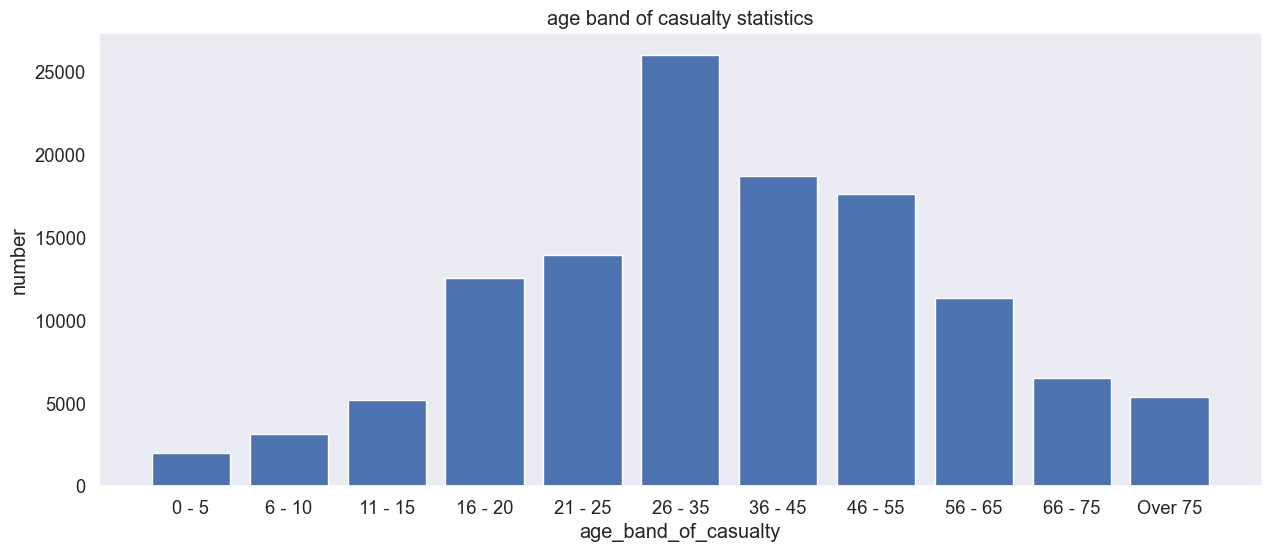

In [30]:
df_1 = df_ques_one.groupby("age_band_of_casualty").size().reset_index()
df_1['sort'] = df_1.age_band_of_casualty.apply(lambda x:int(re.findall("\d+", x)[0]))
df_1 = df_1.sort_values("sort")

plt.figure(figsize=(15,6),dpi=100)
plt.bar(df_1['age_band_of_casualty'], df_1[0])
plt.xlabel("age_band_of_casualty")
plt.ylabel("number")
plt.title("age band of casualty statistics")
plt.grid()
plt.show()

The figure above analyzes the age distribution of the casualties, and it can be seen that the most accidents occurred between the ages of 26 and 35 

In [31]:
def plot_age_other(data, age_name, other_name, pie_name, hist_name):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    mid_1 = data.groupby(other_name).size()
    mid_1 = mid_1/mid_1.sum()
    color_dict = {i:colors[k] for k, i in enumerate(mid_1.index)}
    plt.figure(figsize=(6,6),dpi=100)
    plt.axis('equal')
    plt.pie(x=mid_1.values,labels=mid_1.index,autopct='%0.2f%%',colors = [color_dict.get(i) for i in mid_1.index],
            explode=[0.05] * len(mid_1))
    plt.title(pie_name)
    plt.show()  
    
    fig, ax = plt.subplots(figsize=(15,6),dpi=100)
    for i in data[other_name].unique():
        if str(i) == "nan":
            continue
        mid_2 = df_ques_one[df_ques_one[other_name] == i]
        mid_2[age_name].plot.kde(ax=ax, legend=True,color=color_dict.get(i), label=i)
        mid_2[age_name].plot.hist(density=True, ax=ax,color=color_dict.get(i),alpha=0.7,bins=20)
    ax.set_ylabel('Probability')
    ax.set_xlabel('age')
    plt.title(hist_name)
    plt.xlim(-5,105)
    ax.grid(axis='y')

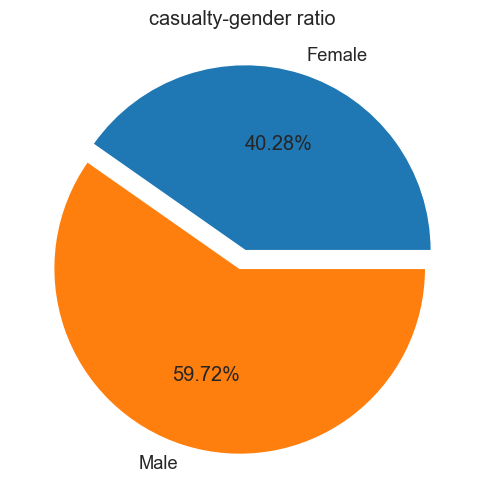

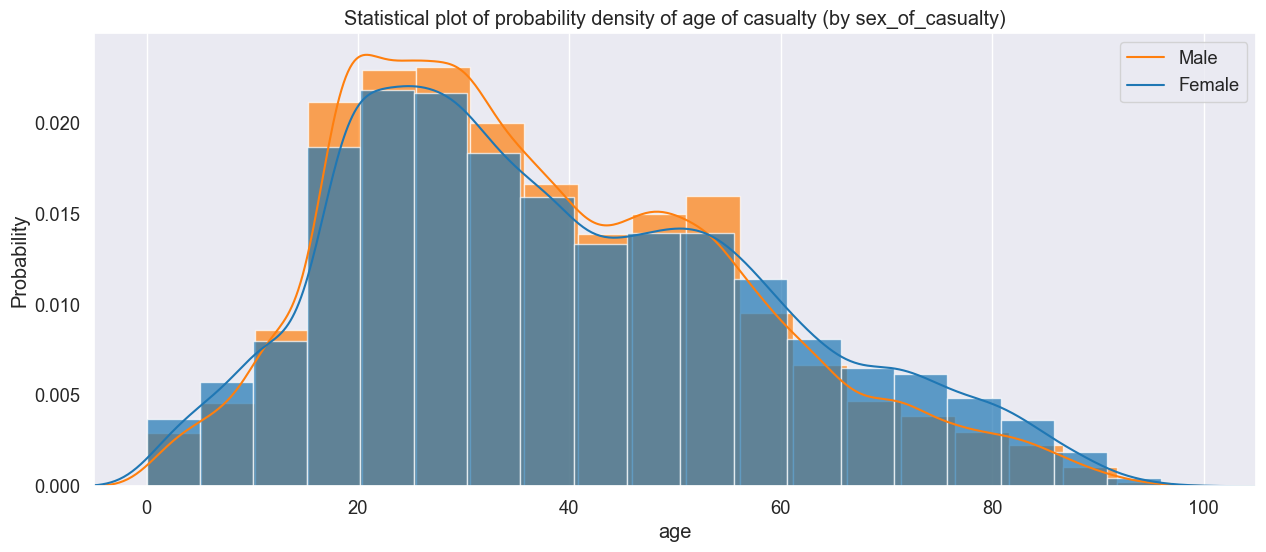

In [32]:
plot_age_other(df_ques_one, 
               "age_of_casualty", 
               "sex_of_casualty", 
               "casualty-gender ratio", 
               "Statistical plot of probability density of age of casualty (by sex_of_casualty)")

The above figure analyzes the gender of the casualties. It can be seen that men are higher than women generally, and the probability of women after the age of 60 is higher than that of men, and the probability of women under the age of 60 is relativelylower

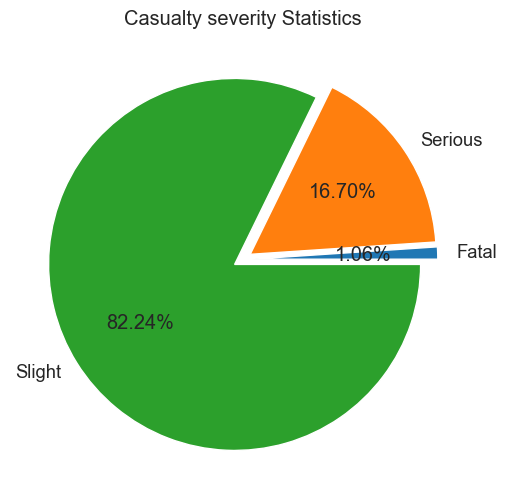

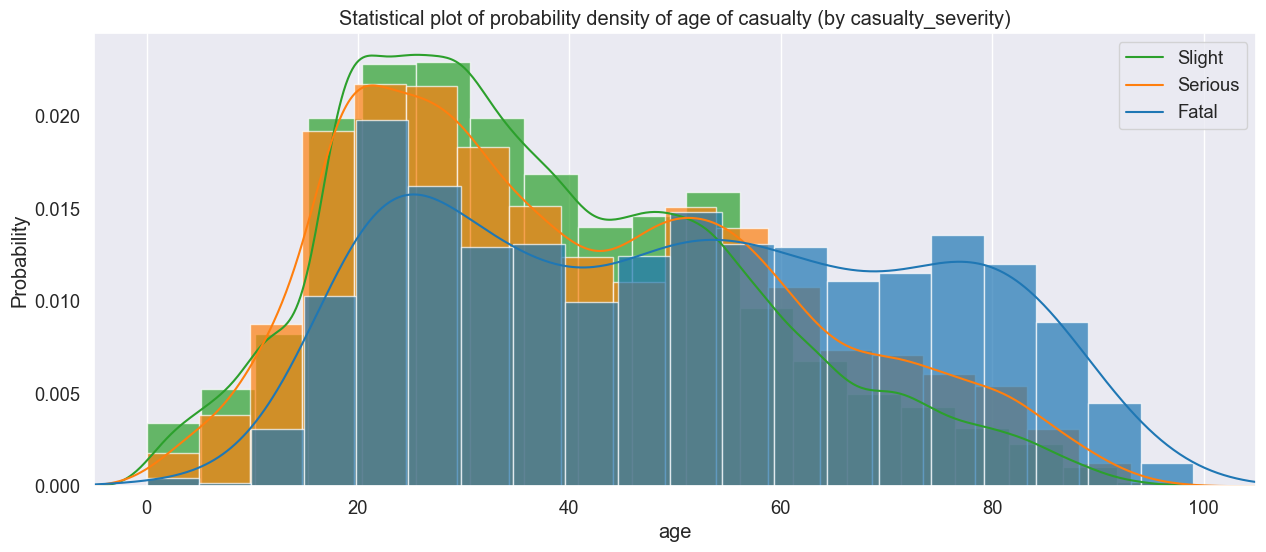

In [33]:
plot_age_other(df_ques_one, 
               "age_of_casualty", 
               "casualty_severity", 
               "Casualty severity Statistics", 
               "Statistical plot of probability density of age of casualty (by casualty_severity)")

The above figure analyzes the severity of the accident. It can be seen that the proportion of Slight injuries is the highest. It can be seen from the probability density map that older people have a higher probability of death

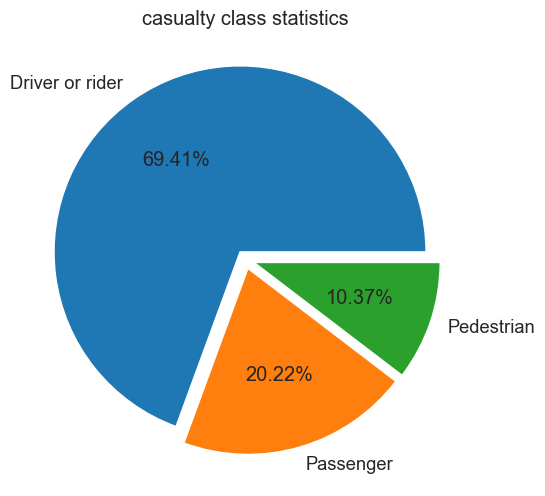

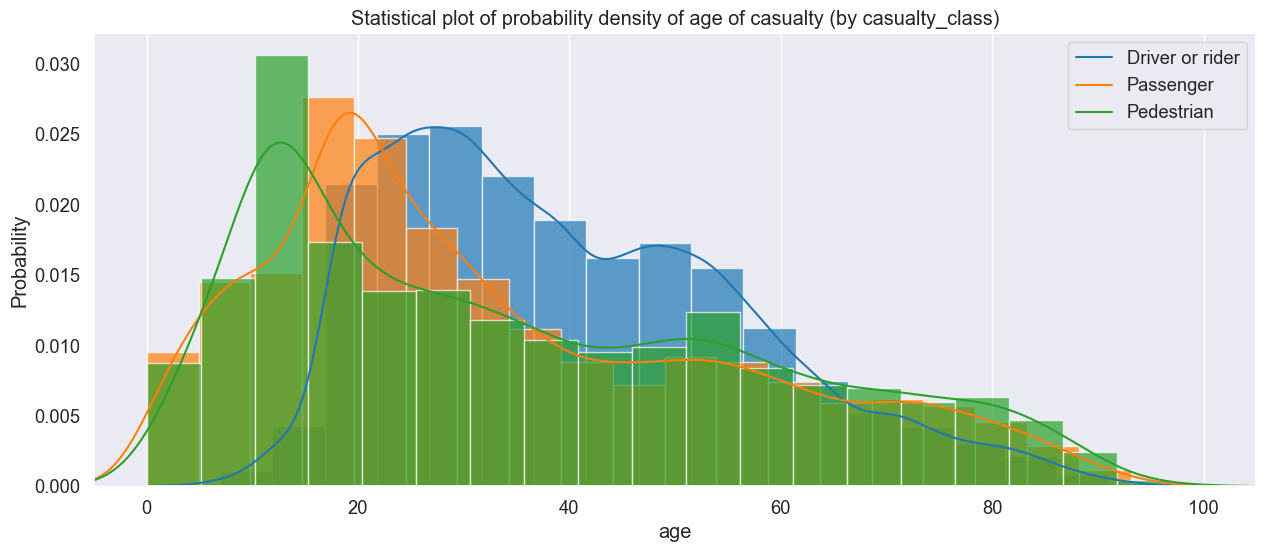

In [34]:
plot_age_other(df_ques_one, 
               "age_of_casualty", 
               "casualty_class", 
               "casualty class statistics", 
               "Statistical plot of probability density of age of casualty (by casualty_class)")

The above figure analyzes the types of casualties, and it can be seen that drivers are the highest group, and their age is generally higher than others (probably because they are too young to drive)

## Looking at accidents which included a killed or seriously injured (KSI) casualty, what patterns are there between the local authorities?

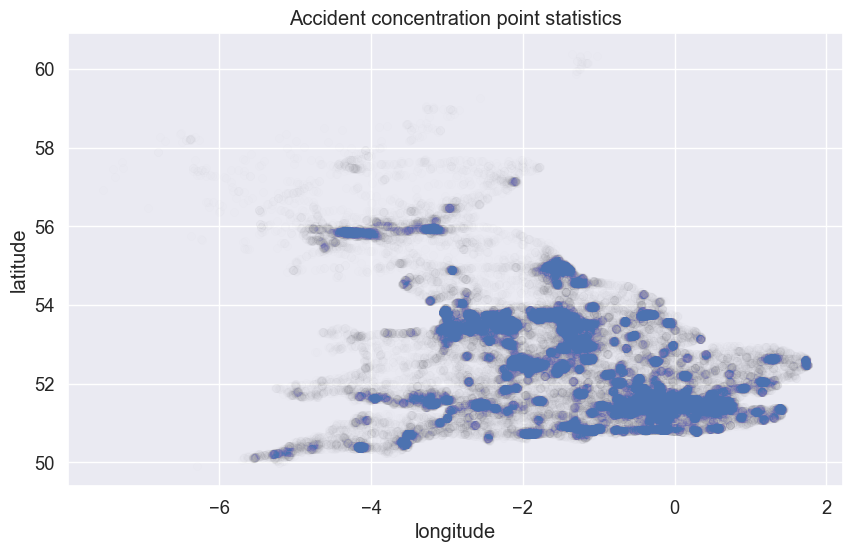

In [35]:
plt.figure(figsize=(10,6),dpi=100)
plt.scatter(df_accident['longitude'],df_accident['latitude'],alpha=0.005)
plt.title("Accident concentration point statistics")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

By drawing the scatter diagram of accidents by latitude and longitude, you can see the latitude and longitude of frequent accidents, which can be compared with the following figure. It can be seen here that (0,51) and (-1.5,53) have more accidents, which are accidents center.

In [36]:
def local_authority_name(data, accident_severity_name, local_authority_name, plot_1=True):
    mid_1 = data.drop_duplicates("accident_reference")
    mid_2 = mid_1[local_authority_name].value_counts()[:10].index.tolist()
    mid_3 = mid_1[mid_1[local_authority_name].isin(mid_2)]
    if plot_1:
        plt.figure(figsize=(10,6),dpi=100)
        mid_1[local_authority_name].value_counts()[:10][::-1].plot.barh()
        plt.title(f"{local_authority_name} Top 10")
        plt.ylabel(local_authority_name)
        plt.xlabel("count")
        plt.show()
        plt.figure(figsize=(10,6),dpi=100)
        sns.scatterplot(data=mid_3,x='longitude',y='latitude',hue=local_authority_name, alpha=0.01)
        plt.show()
        
    for i in accident_severity_name:
        sns.catplot(x=local_authority_name,kind="count",data=mid_3,hue=i,height=6,aspect=2)
        plt.title("Correlation statistical graph",fontsize=20)
        plt.xlabel(local_authority_name,fontsize=18)
        plt.ylabel("count",fontsize=18)
        plt.show()

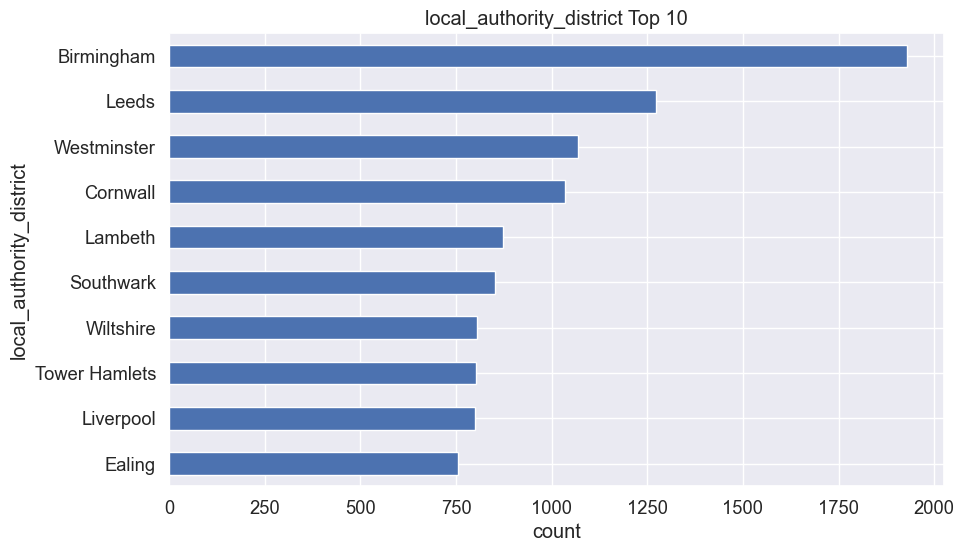

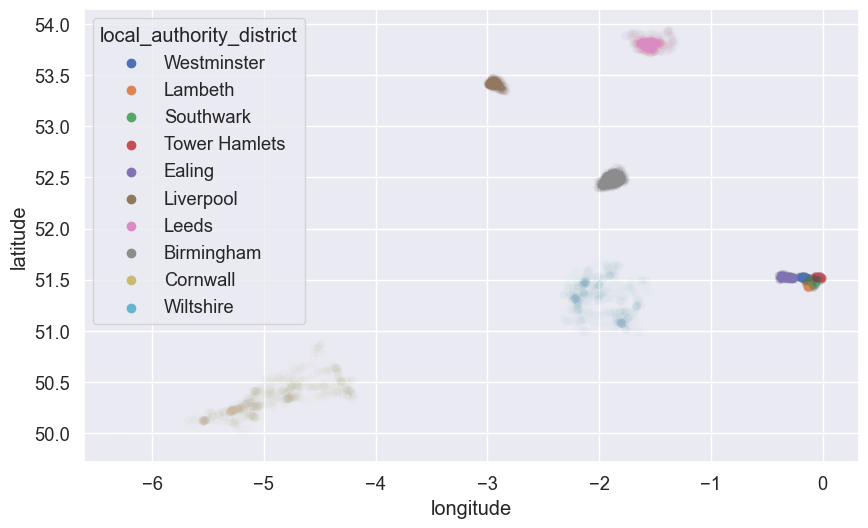

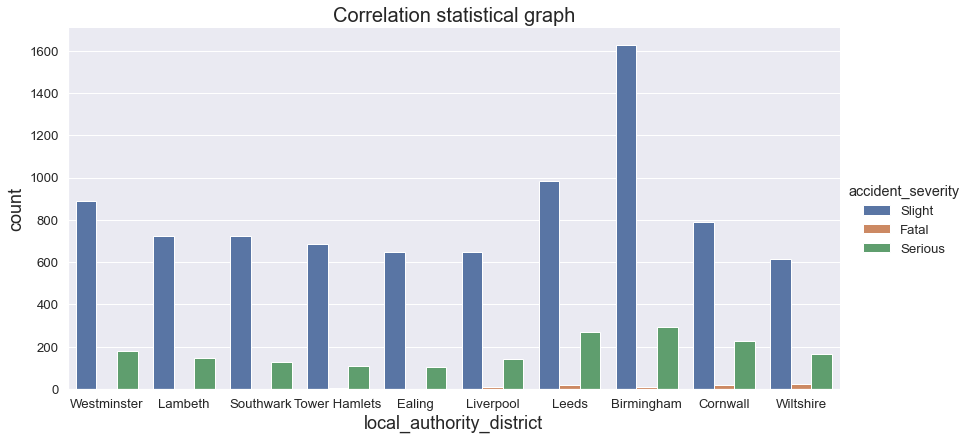

In [37]:
local_authority_name(df, ["accident_severity"], "local_authority_district")

The figure above shows the statistics of the local authorities. It can be seen that Birmingham is the place where accidents are most likely to occur, and the place is located at (-2,52.5). It can also be seen that these accidents are relatively minor and have little to do with the local authorities. The above is part of the conclusions, you can see the pictures yourself

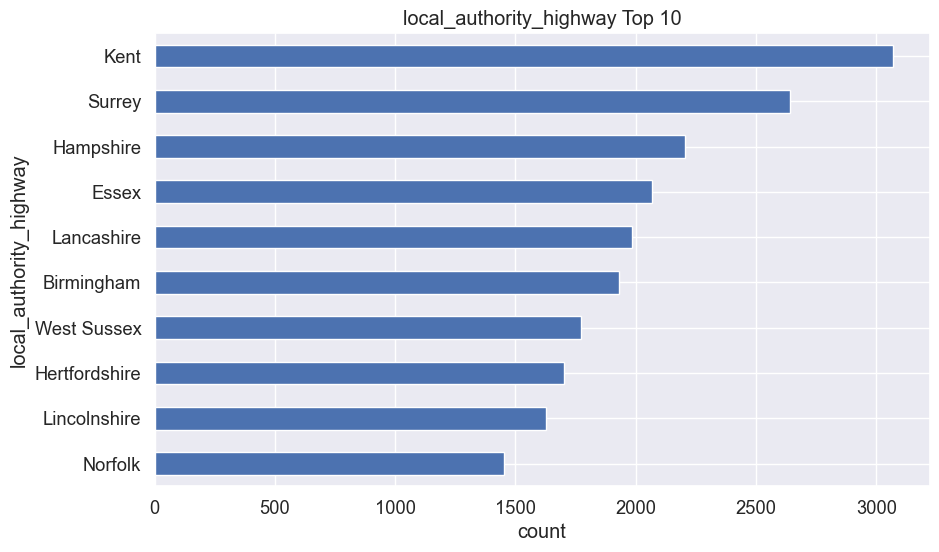

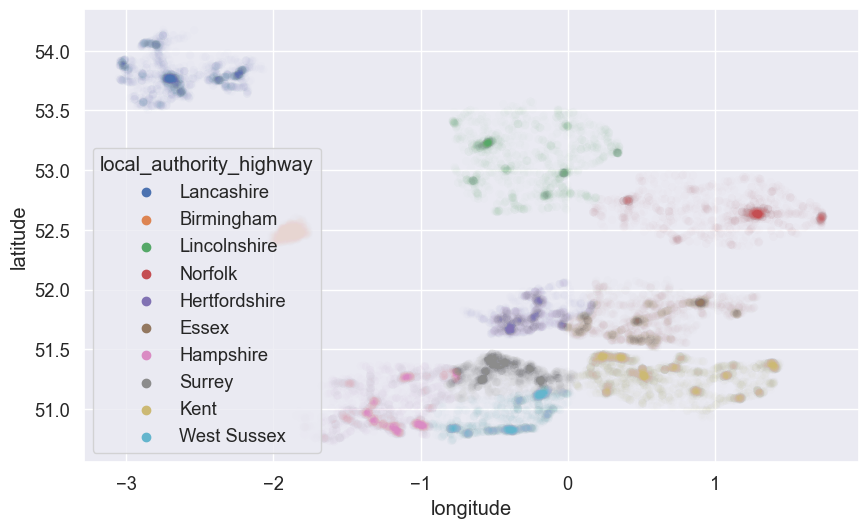

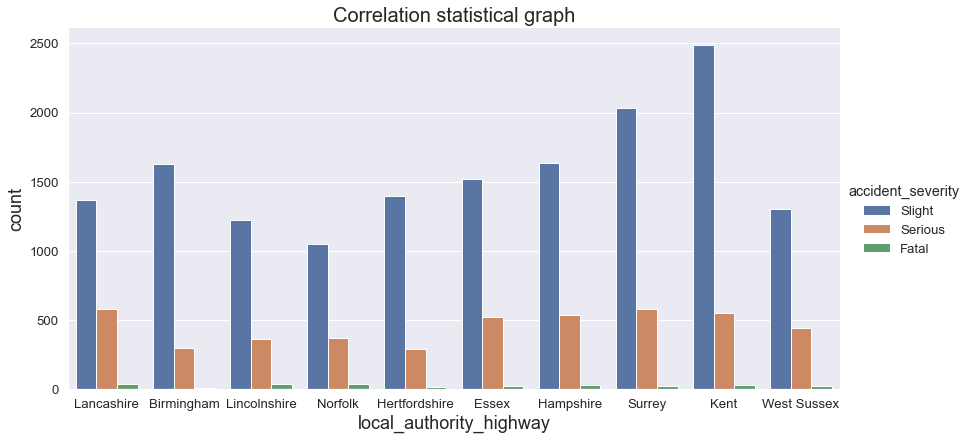

In [38]:
local_authority_name(df, ["accident_severity"], "local_authority_highway")

The above picture makes statistics for highway authorities. The nature of the picture is the same as that of local authorities. You can look at the picture and write a conclusion

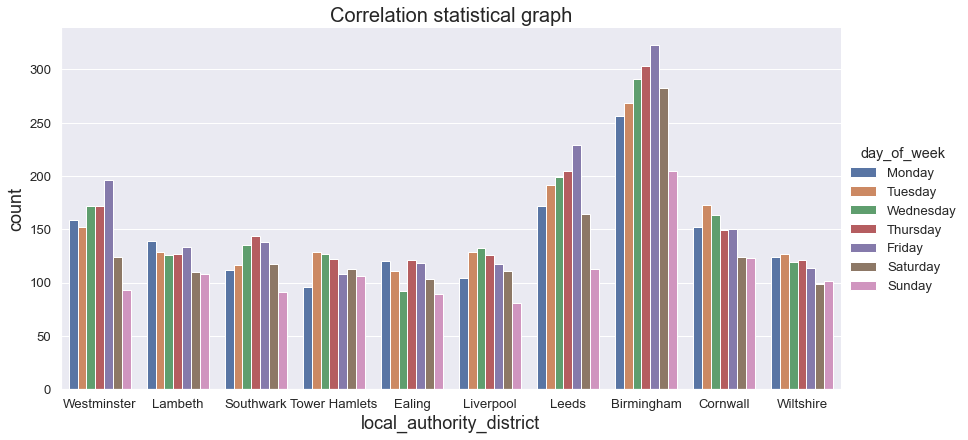

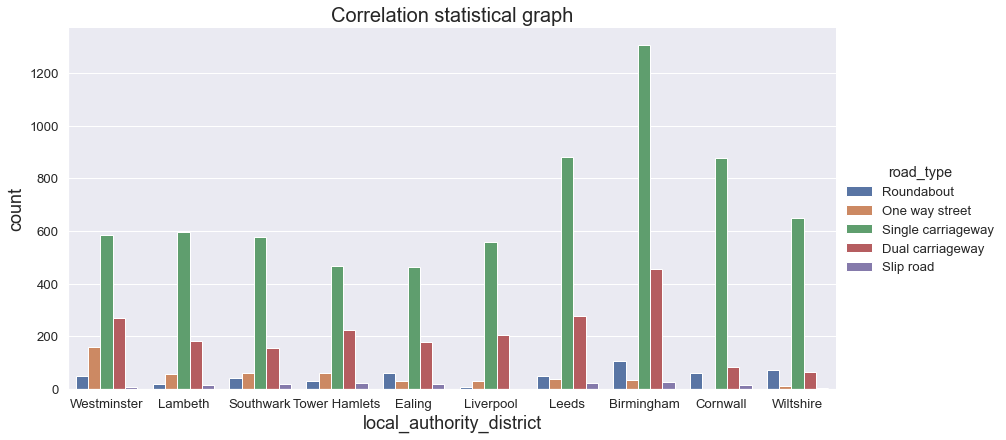

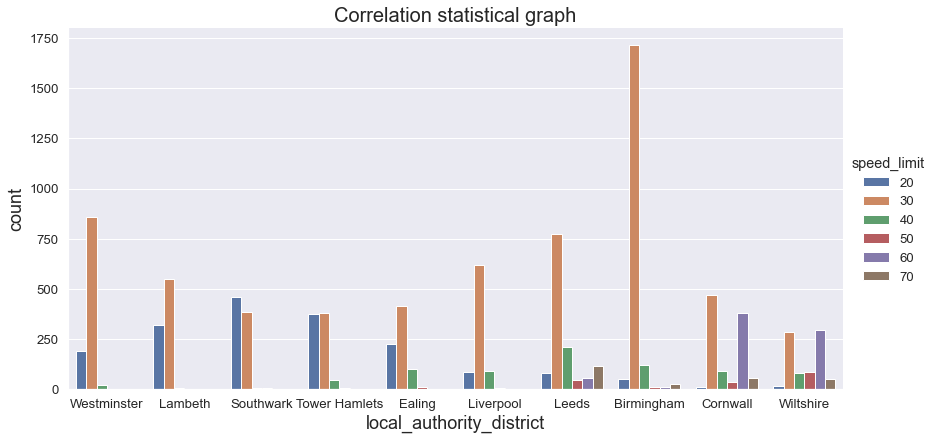

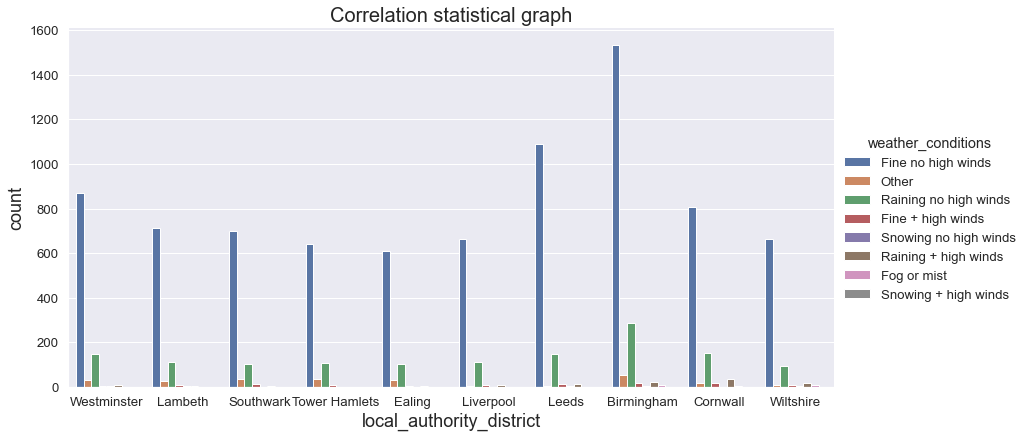

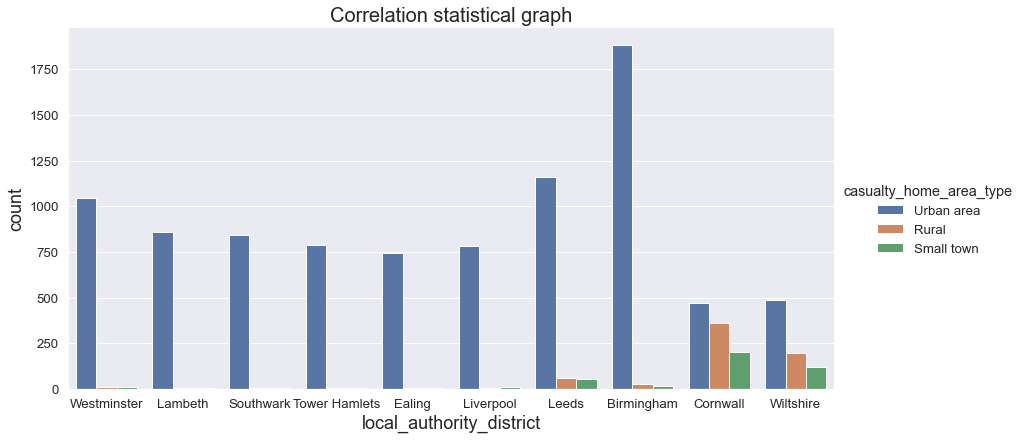

In [39]:
local_authority_name(df, ["day_of_week", "road_type", "speed_limit", "weather_conditions", 
                          "casualty_home_area_type"], "local_authority_district", plot_1=False)

The above figure makes statistics on local authorities, and correlates factors such as "day_of_week", "road_type", "speed_limit", "weather_conditions", "casualty_home_area_type", and performs correlation analysis to play a supplementary role. If you don’t need it, you can ignore it

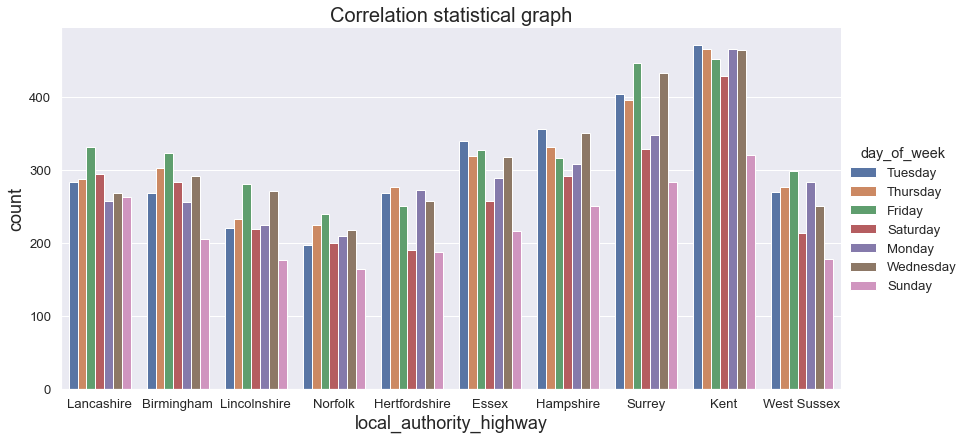

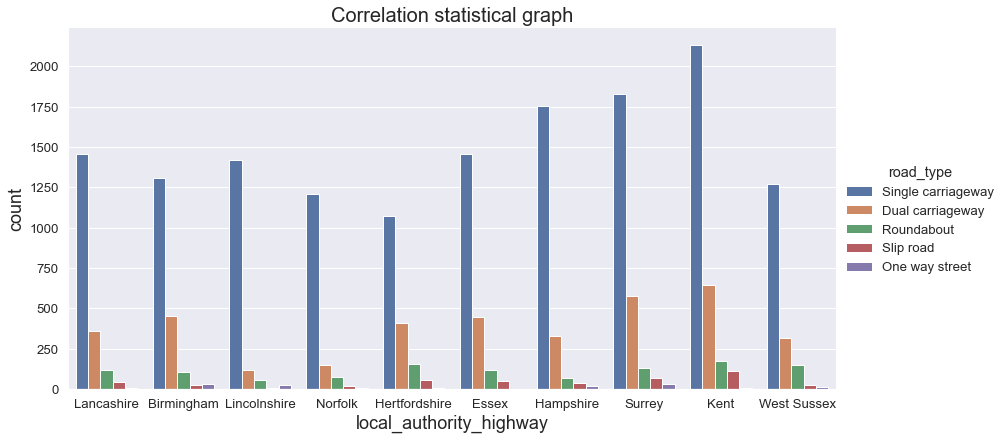

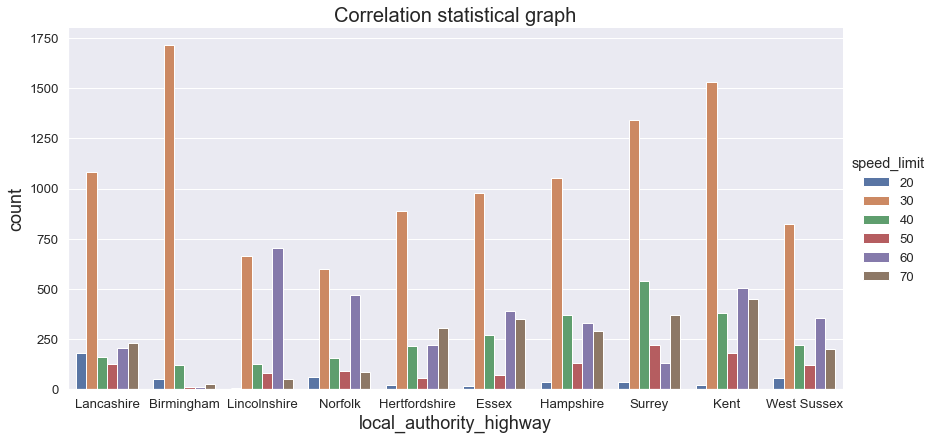

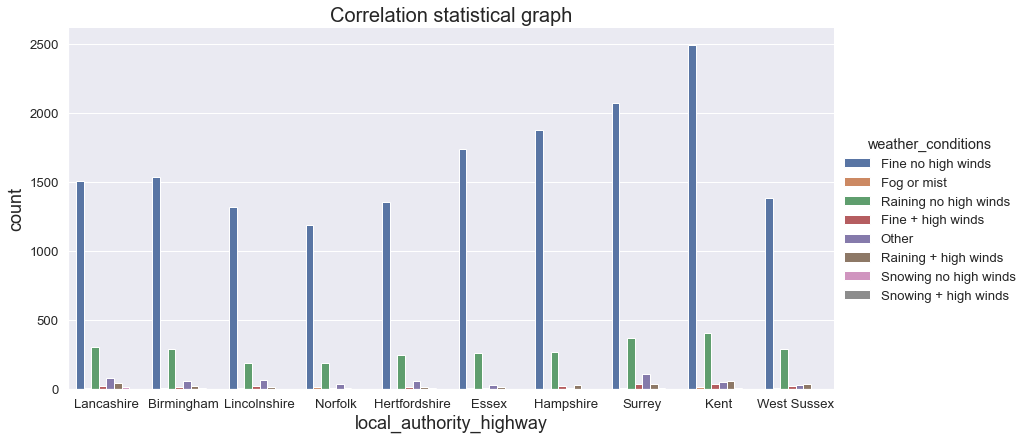

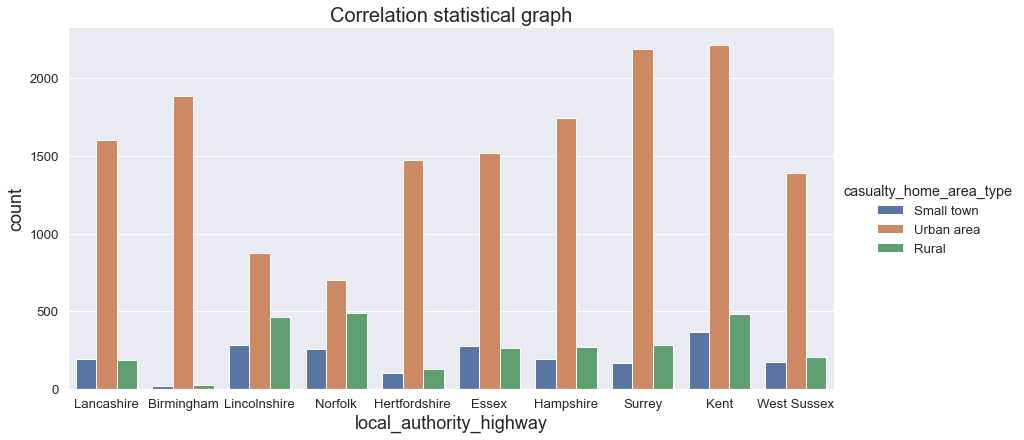

In [40]:
local_authority_name(df, ["day_of_week", "road_type", "speed_limit", "weather_conditions", 
                          "casualty_home_area_type"], "local_authority_highway", plot_1=False)

The above figure makes statistics on local authorities, and correlates factors such as "day_of_week", "road_type", "speed_limit", "weather_conditions", "casualty_home_area_type", and performs correlation analysis to play a supplementary role. If you don’t need it, you can ignore it- it shows Birmingham has the highest 

## What patterns are there in pedestrians who were KSI casualties?

In [41]:
df_pedestrian = df[df['casualty_class'] == "Pedestrian"]
df_pedestrian = df_pedestrian[(df_pedestrian.casualty_severity == "Serious") |  (df_pedestrian.casualty_severity == "Fatal")]
df_pedestrian = df_pedestrian[["accident_severity","road_type","speed_limit","weather_conditions","light_conditions","road_surface_conditions","casualty_home_area_type","pedestrian_road_maintenance_worker","pedestrian_location",
                               "pedestrian_movement","casualty_severity"]] 

In [42]:
df_pedestrian.head(3)


,accident_severity,road_type,speed_limit,weather_conditions,light_conditions,road_surface_conditions,casualty_home_area_type,pedestrian_road_maintenance_worker,pedestrian_location,pedestrian_movement,casualty_severity
3,Serious,Single carriageway,20,Fine no high winds,Darkness - lights lit,Dry,Urban area,No / Not applicable,"In carriageway, crossing elsewhere",Crossing from offside - masked by parked or s...,Serious
15,Fatal,Dual carriageway,40,Fine no high winds,Darkness - no lighting,Dry,Urban area,No / Not applicable,"In carriageway, crossing elsewhere",Crossing from driver's nearside,Fatal
65,Serious,Single carriageway,30,Fine no high winds,Darkness - lights lit,Dry,Urban area,No / Not applicable,"In carriageway, crossing elsewhere",Crossing from driver's nearside,Serious


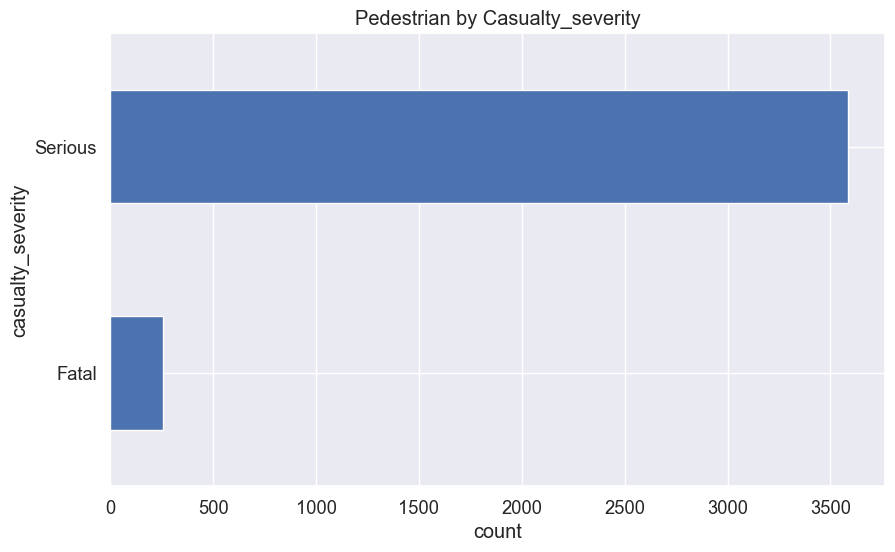

In [43]:
plt.figure(figsize=(10,6),dpi=100)
df_pedestrian.groupby('casualty_severity').size().plot.barh()
plt.title("Pedestrian by Casualty_severity")
plt.xlabel("count")
plt.show()

All the following graphs are pedestrian data

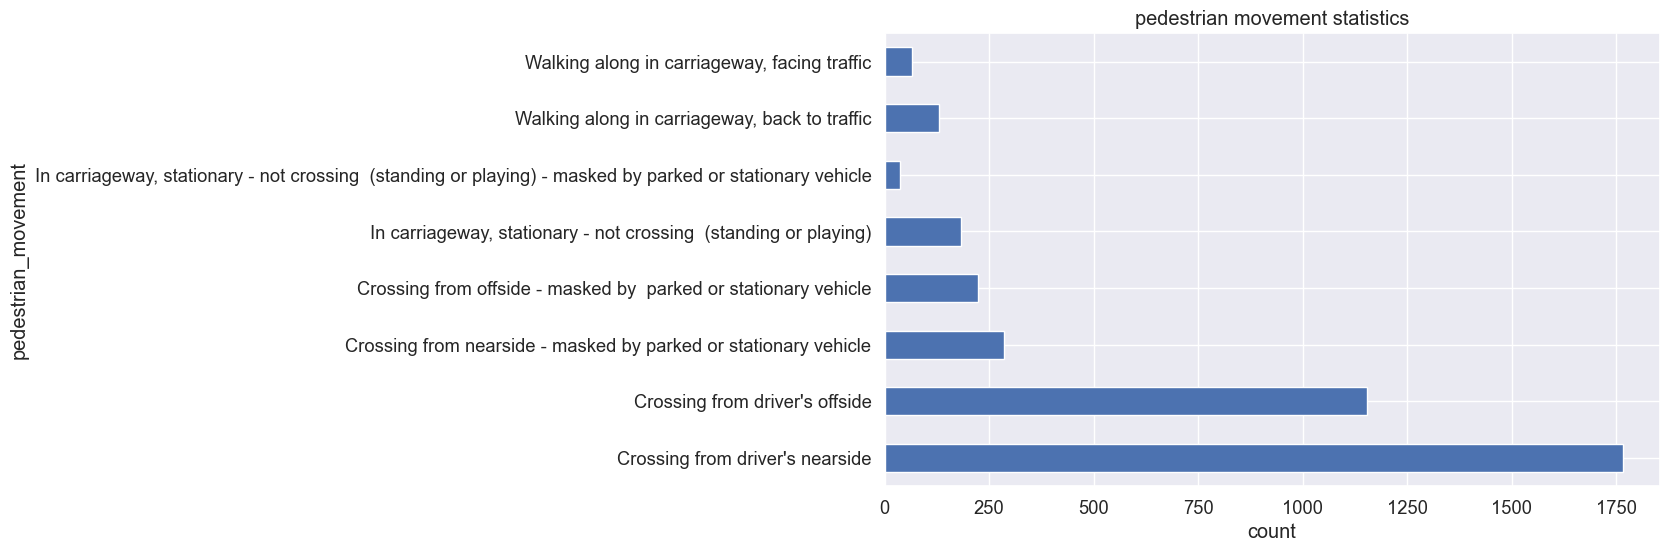

In [44]:
plt.figure(figsize=(10,6),dpi=100)
df_pedestrian.groupby('pedestrian_movement').size().plot.barh()
plt.title("pedestrian movement statistics")
plt.xlabel("count")
plt.show()

Statistical analysis of the movement of pedestrians in the figure above, it can be seen that people who shuttle from the right side of the driver are more likely to be involved in a car accident

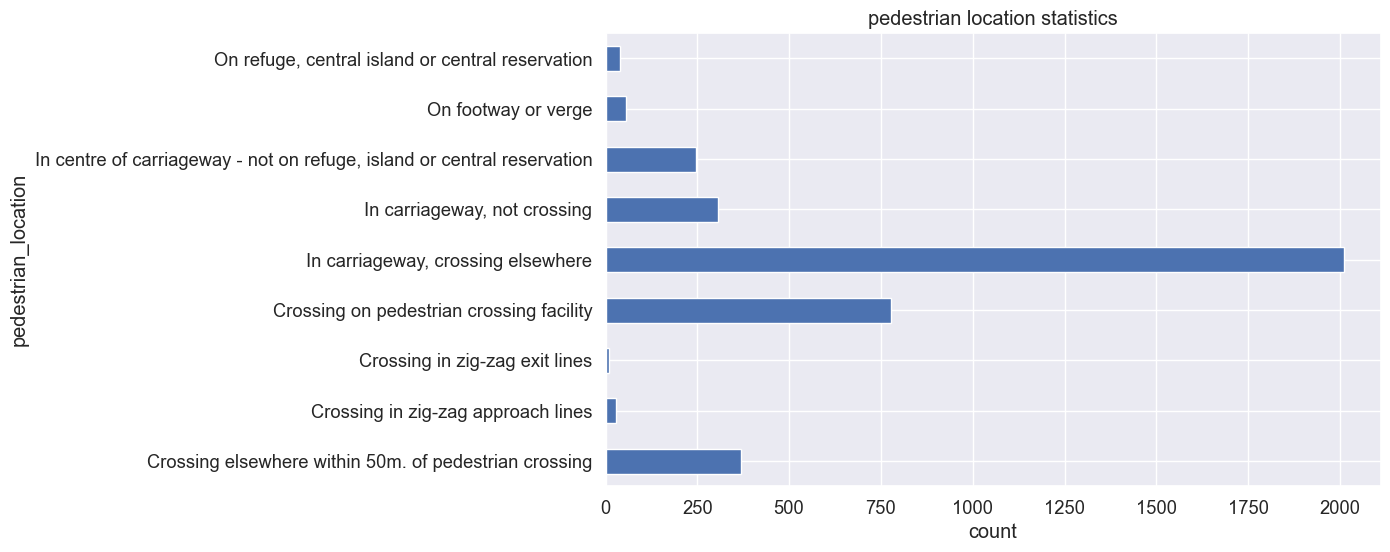

In [45]:
plt.figure(figsize=(10,6),dpi=100)
df_pedestrian.groupby('pedestrian_location').size().plot.barh()
plt.title("pedestrian location statistics")
plt.xlabel("count")
plt.show()

Statistical analysis of the location of pedestrians in the above figure, it can be seen that In carriageway, crossing elsewhere is the most

pedestrian_location:
{'Not a Pedestrian': 0, 'Crossing on pedestrian crossing facility': 1, 'Crossing in zig-zag approach lines': 2, 'Crossing in zig-zag exit lines': 3, 'Crossing elsewhere within 50m. of pedestrian crossing': 4, 'In carriageway, crossing elsewhere': 5, 'On footway or verge': 6, 'On refuge, central island or central reservation': 7, 'In centre of carriageway - not on refuge, island or central reservation': 8, 'In carriageway, not crossing': 9, 'Unknown or other': 10, 'Data missing or out of range': -1}
pedestrian_movement:
{'Not a Pedestrian': 0, "Crossing from driver's nearside": 1, 'Crossing from nearside - masked by parked or stationary vehicle': 2, "Crossing from driver's offside": 3, 'Crossing from offside - masked by  parked or stationary vehicle': 4, 'In carriageway, stationary - not crossing  (standing or playing)': 5, 'In carriageway, stationary - not crossing  (standing or playing) - masked by parked or stationary vehicle': 6, 'Walking along in carriageway, f

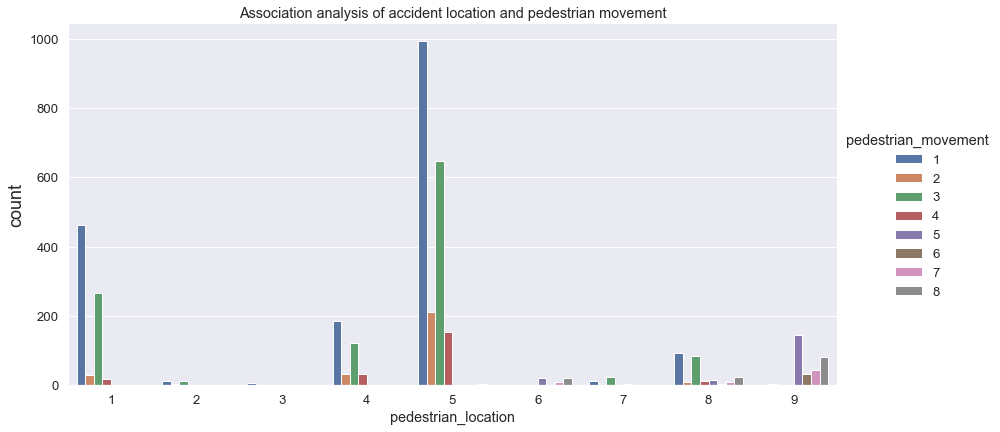

In [46]:
pedestrian_location_dicts = dict()
for i in df_data_guide[df_data_guide['field name'] == "pedestrian_location"].values:
    pedestrian_location_dicts[i[3]] = i[2]
pedestrian_movement_dicts = dict()
for i in df_data_guide[df_data_guide['field name'] == "pedestrian_movement"].values:
    pedestrian_movement_dicts[i[3]] = i[2]
print("pedestrian_location:")
print(pedestrian_location_dicts)
print("pedestrian_movement:")
print(pedestrian_movement_dicts)
if 1 in df_pedestrian['pedestrian_location'].unique():
    pass
else:
    df_pedestrian['pedestrian_location'] = df_pedestrian['pedestrian_location'].apply(
        lambda x:pedestrian_location_dicts.get(x))
    df_pedestrian['pedestrian_movement'] = df_pedestrian['pedestrian_movement'].apply(
        lambda x:pedestrian_movement_dicts.get(x))
sns.catplot(x='pedestrian_location',kind="count",data=df_pedestrian,hue='pedestrian_movement',height=6,aspect=2)
plt.title("Association analysis of accident location and pedestrian movement")
plt.ylabel("count",fontsize=18)
plt.show()

Combining the location of pedestrians and the movement of pedestrians, the combination of In carriageway, crossing elsewhere and Crossing from driver's nearside is the most likely to cause accidents

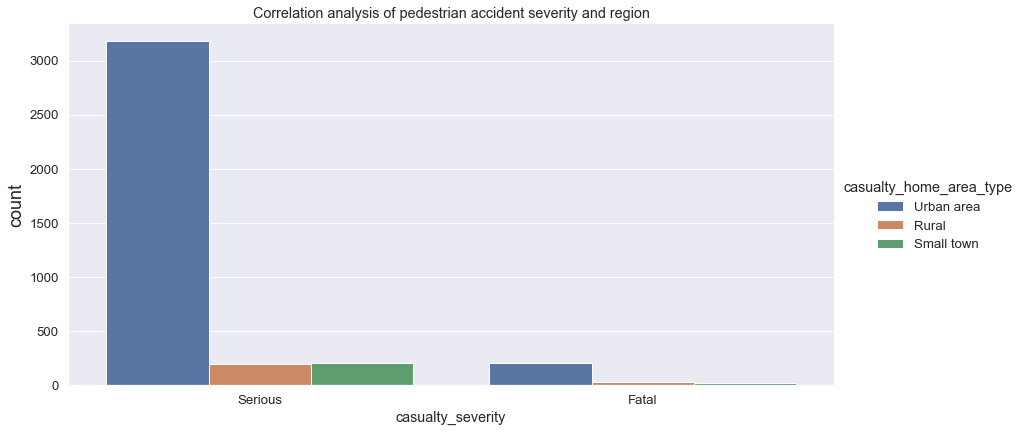

In [47]:
sns.catplot(x='casualty_severity',kind="count",data=df_pedestrian,hue='casualty_home_area_type',height=6,aspect=2)
plt.ylabel("count",fontsize=18)
plt.title("Correlation analysis of pedestrian accident severity and region")
plt.show()

The above picture is an analysis of the severity of pedestrian accidents and the area where the accident is located. It can be seen that there is no great relationship but accidents are more prominent in urban and rural areas

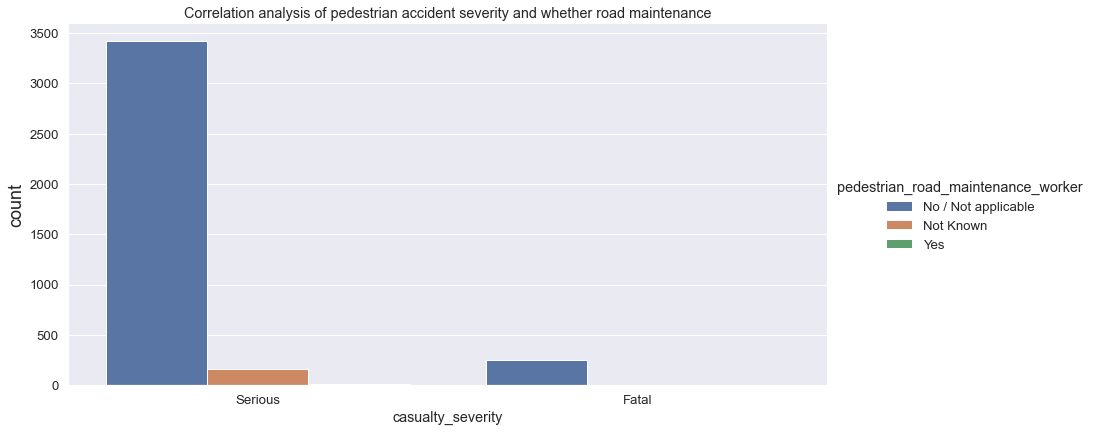

In [48]:
sns.catplot(x='casualty_severity',kind="count",
            data=df_pedestrian,hue='pedestrian_road_maintenance_worker',height=6,aspect=2)
plt.ylabel("count",fontsize=18)
plt.title("Correlation analysis of pedestrian accident severity and whether road maintenance")
plt.show()

The above picture is a correlation analysis of the severity of pedestrian accidents and whether there are road maintenance personnel. It can be seen that there are generally no accidents during road maintenance (the conclusion is useless, you can use it according to the situation)

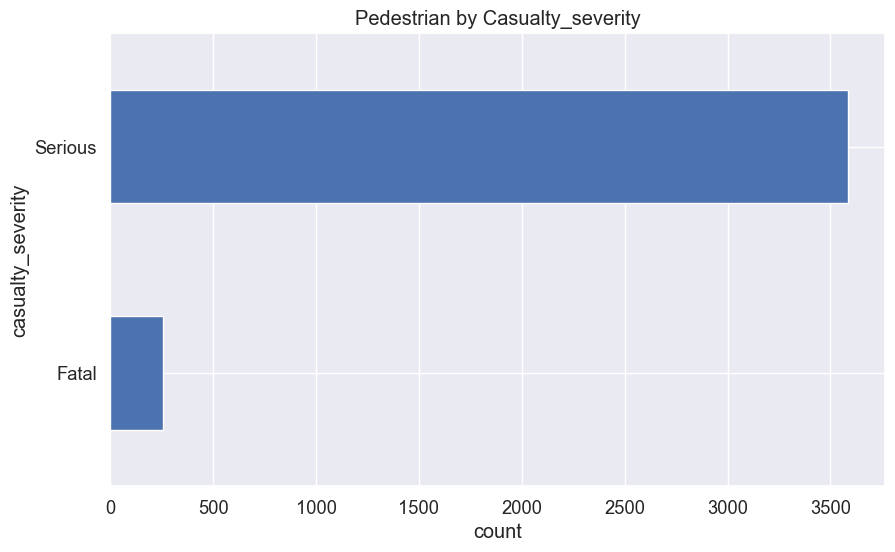

In [49]:
plt.figure(figsize=(10,6),dpi=100)
df_pedestrian.groupby('casualty_severity').size().plot.barh()
plt.title("Pedestrian by Casualty_severity")
plt.xlabel("count")
plt.show()